In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

In [33]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import matplotlib.animation as animation

In [4]:
hf=pd.read_csv("/Users/mennayoussef/Downloads/heart_failure_clinical_records_dataset.csv")
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Exploratory Data Analysis


In [18]:
# categorize features into numerical and categorical features
categorical_features = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
numerical_features = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

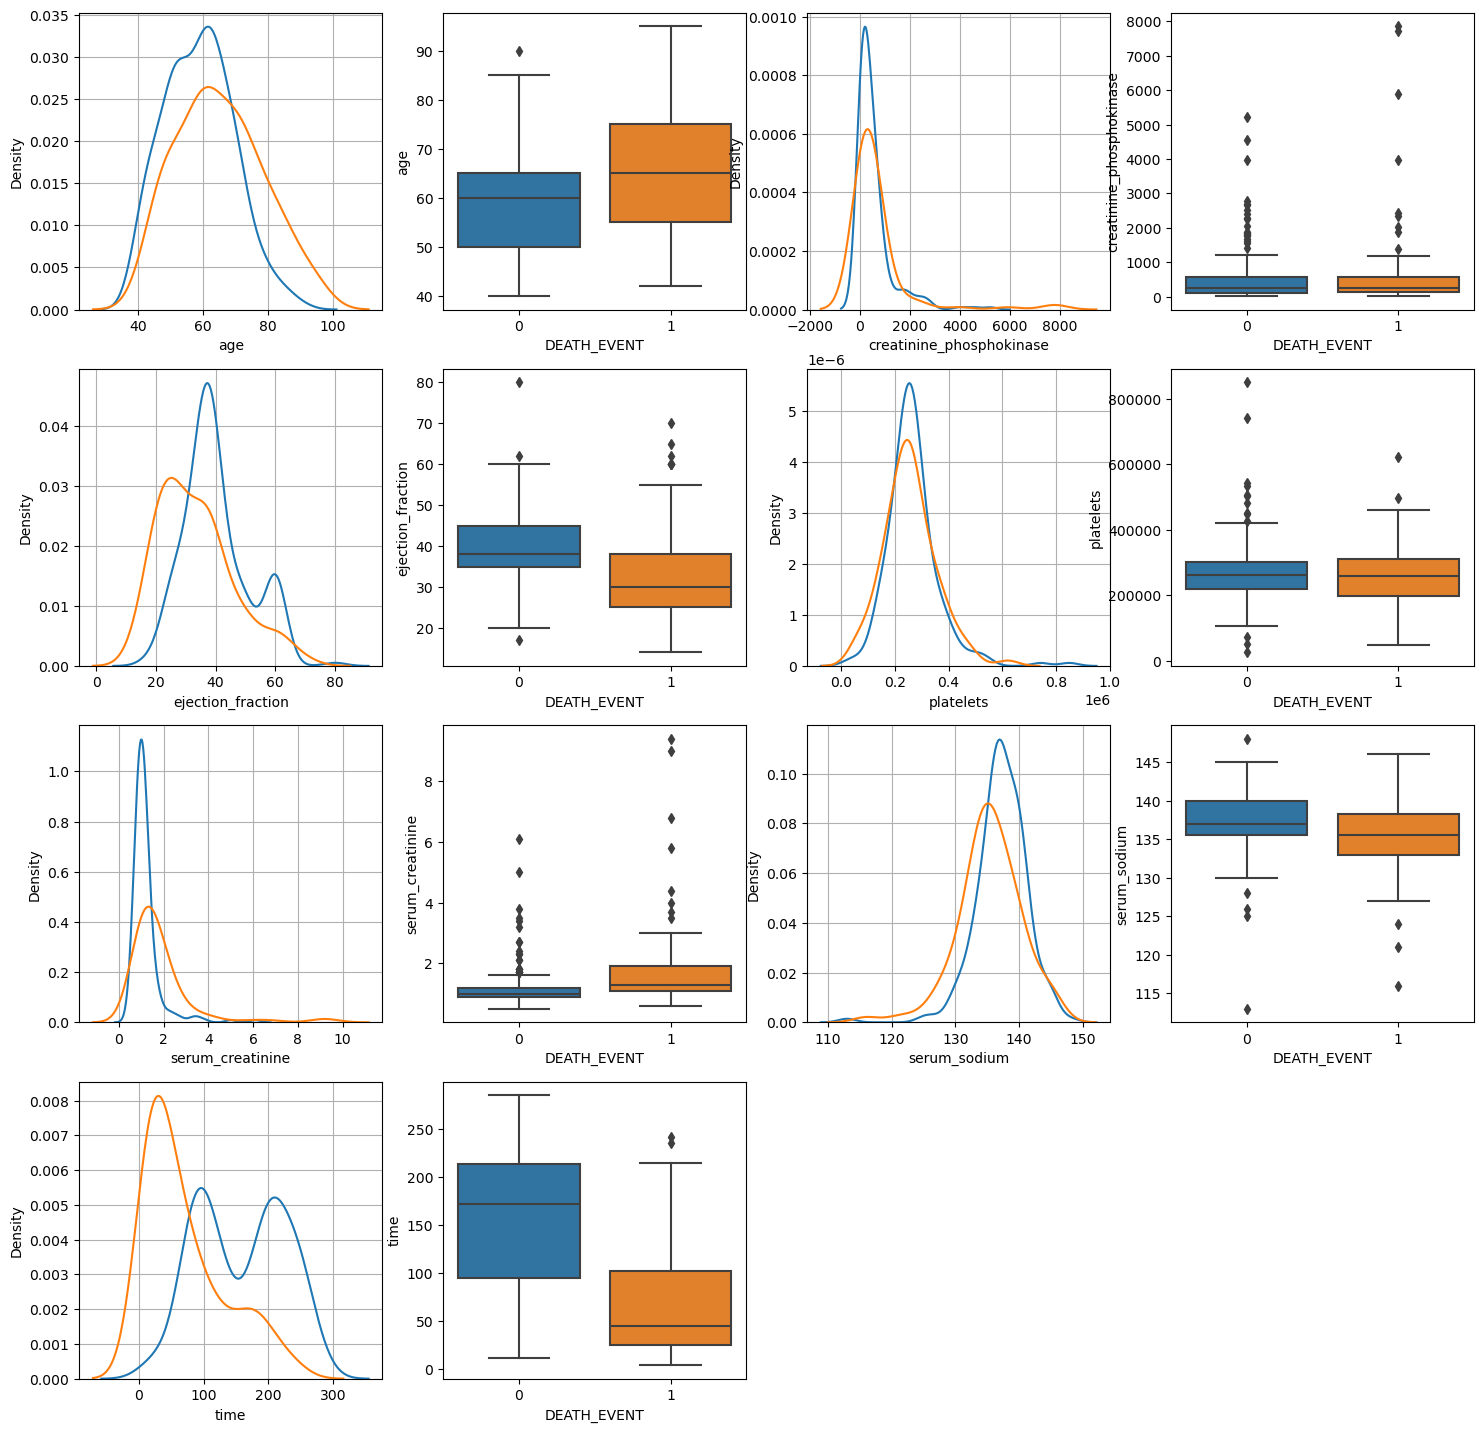

In [12]:
#kde and box plots of numerical features
plt.figure(figsize=(18,27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    
    plt.grid(True)
    #sns.kdeplot(x=hf[col], data=hf, hue="DEATH_EVENT", kernel="gau")
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, col], label="alive")
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, col], label="dead")
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y=col, x="DEATH_EVENT", data=hf)
    
    

The highest variation seems to be in the serum creatinine and ejection fraction variables.

# Data standardization

In [7]:
#set features to X and target to y
X=hf.drop(["DEATH_EVENT"], axis=1)
y=hf["DEATH_EVENT"]
col_names = list(X.columns)
scaler = StandardScaler()
X_df= scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns = col_names)
X_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


# Correlation matrix

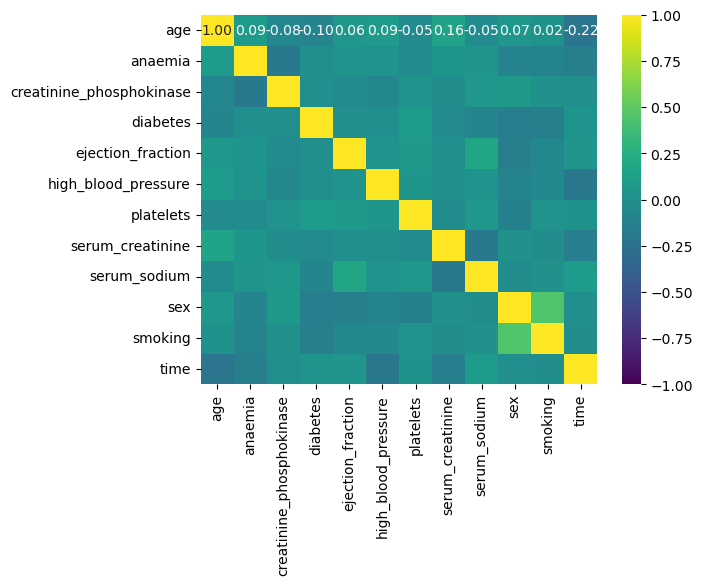

In [8]:

sns.heatmap(X_df.corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

features seems to be uncorrelated

# Dataset split

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [31]:
X_train, X_test = train_test_split(X_df, train_size=0.75, random_state=42)
y_train, y_test = train_test_split(y, train_size = 0.75, random_state=42)

# Mutual Information
## Degree of feature dependency on the target

Text(0.5, 0, 'Mutual Information')

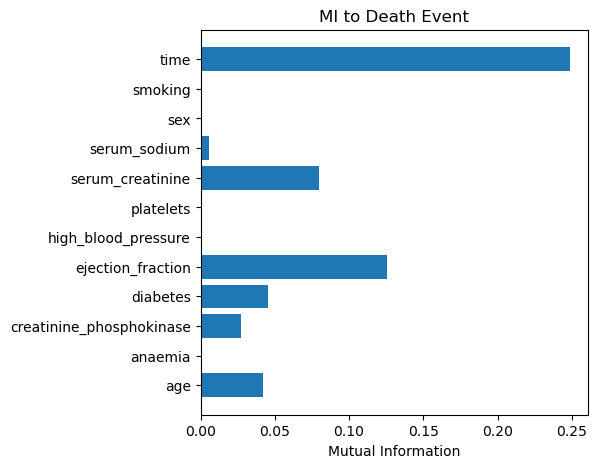

In [29]:
from sklearn.feature_selection import mutual_info_classif

all_features = X_df.columns.tolist()

MI = mutual_info_classif(hf[all_features], hf["DEATH_EVENT"])

plt.figure(figsize=(5,5))
plt.barh(y=all_features, width=MI)
plt.title("MI to Death Event")
plt.xlabel("Mutual Information")

Time, serum creatinine and ejection fraction show high dependency to death event.


In [38]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

#1-Initializing the ANN
model = Sequential()

#2-Define the ANN by adding layers
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

from keras.optimizers import SGD

#3-Compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

#4-Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs = 1000,callbacks=[early_stopping], validation_split=0.2) 



Epoch 1/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.6927 - accuracy: 0.6369 - val_loss: 0.6917 - val_accuracy: 0.7556
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.6983 - val_loss: 0.6903 - val_accuracy: 0.7556
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.6983 - val_loss: 0.6889 - val_accuracy: 0.7556
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.6983 - val_loss: 0.6875 - val_accuracy: 0.7556
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.6983 - val_loss: 0.6860 - val_accuracy: 0.7556
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.6983 - val_loss: 0.6844 - val_accuracy: 0.7556
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.6983 - val_loss: 0.6829 - val_accuracy: 0.7556
Epoch 8/1000
6/6 [=

6/6 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.7989 - val_loss: 0.4091 - val_accuracy: 0.7778
Epoch 60/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8380 - val_loss: 0.4094 - val_accuracy: 0.8000
Epoch 61/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3521 - accuracy: 0.8045 - val_loss: 0.4119 - val_accuracy: 0.8000
Epoch 62/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8324 - val_loss: 0.4145 - val_accuracy: 0.8000
Epoch 63/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.7821 - val_loss: 0.4173 - val_accuracy: 0.7778
Epoch 64/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.8101 - val_loss: 0.4204 - val_accuracy: 0.7778
Epoch 65/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.7989 - val_loss: 0.4229 - val_accuracy: 0.7778
Epoch 66/1000
6/6 [========

In [42]:
val_acc = np.mean(history.history['val_accuracy'])
val_acc

0.7676767815243114

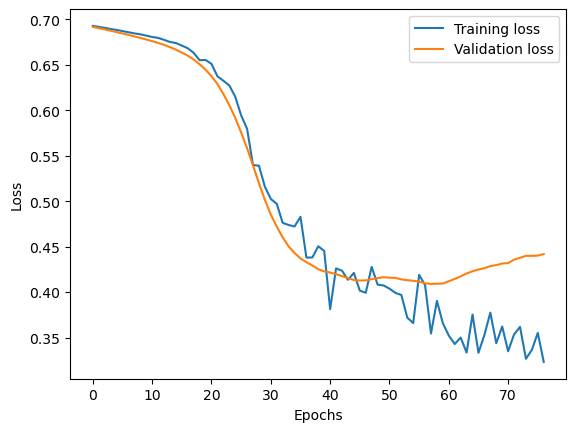

In [41]:
#plot training and validation loss over epochs
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='Training loss')
plt.plot(history_df['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

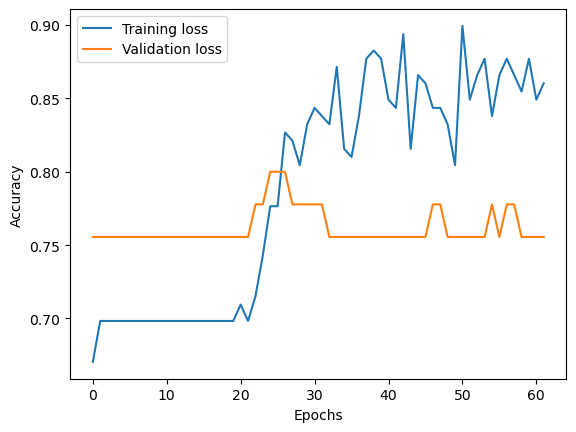

In [37]:
#plot training and validation accuracy over epochs
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label='Training loss')
plt.plot(history_df['val_accuracy'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [43]:
#predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 619us/step


<Axes: >

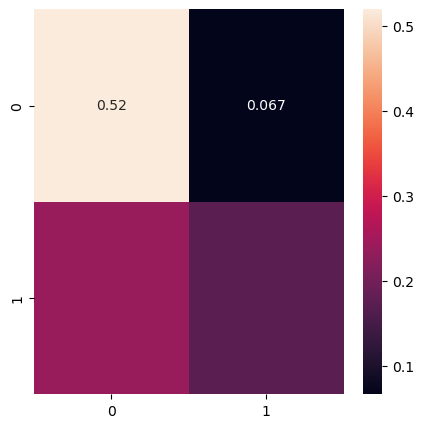

In [48]:
#confusion matrix
plt.subplots(figsize=(5,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77        44
           1       0.72      0.42      0.53        31

    accuracy                           0.69        75
   macro avg       0.70      0.65      0.65        75
weighted avg       0.70      0.69      0.67        75

